In [18]:
import warnings
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')


warnings.filterwarnings("ignore")

rng = 0


In [19]:
# Loading of dataset, with data preprocessing
train_features = pd.read_csv('./data/train_features_modified.csv')
train_labels = pd.read_csv('./data/dengue_labels_train.csv')
test_features = pd.read_csv('./data/test_features_modified.csv')
# convert week_start_date column to datetime
train_features['week_start_date'] = pd.to_datetime(
    train_features['week_start_date'])
test_features['week_start_date'] = pd.to_datetime(
    test_features['week_start_date'])


In [20]:
# merging features and labels
train_features = pd.merge(train_features, train_labels, on=[
                          'city', 'year', 'weekofyear'])


In [21]:
# Seperate data for San Juan
sj_train_features = train_features[train_features.city == 'sj']
sj_train_labels = train_labels[train_labels.city == 'sj']

# Separate data for Iquitos
iq_train_features = train_features[train_features.city == 'iq']
iq_train_labels = train_labels[train_labels.city == 'iq']


## Classification


<AxesSubplot:xlabel='week_start_date'>

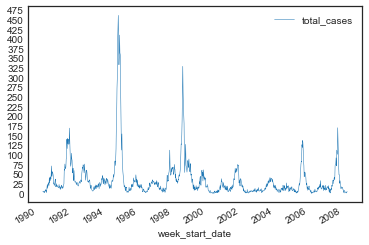

In [22]:
# San Juan histogram
sj_train_features.plot(x='week_start_date', y='total_cases',
                       linewidth=0.5, yticks=range(0, 500, 25))


From the graph, we can see that there are a few different peak values. They are around 50, 75, 150, 200, 325 and 500. We can use these peaks to split the values into, from 0 to 75, 75 to 150, 150 to 200, 200 to 350 and 350 to 500.


In [23]:
sj_bins = pd.IntervalIndex.from_tuples(
    [(0, 50), (50, 75), (75, 150), (150, 200), (200, 350), (350, 500)])
sj_train_features['range'] = pd.cut(
    sj_train_features.total_cases, bins=sj_bins, labels=['1', '2', '3', '4', '5', '6'])


<AxesSubplot:xlabel='week_start_date'>

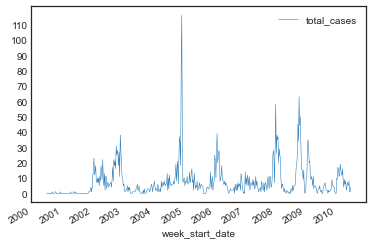

In [24]:
# San Juan histogram
iq_train_features.plot(x='week_start_date', y='total_cases',
                       linewidth=0.5, yticks=range(0, 120, 10))


From the graph, we can see that there are a few different peak values. They are around 10, 20, 40, 60 and 120. We can use these peaks to split the values into, from 0 to 75, 75 to 150, 150 to 200, 200 to 350 and 350 to 500.


In [25]:
iq_bins = pd.IntervalIndex.from_tuples(
    [(0, 10), (10, 20), (20, 40), (40, 60), (60, 120)])
iq_train_features['range'] = pd.cut(
    iq_train_features.total_cases, bins=iq_bins, labels=['1', '2', '3', '4', '5'])
